# Figure 1

In [1]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from numpy import array as arr
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from importlib import reload
from fitters import gaussian
import MarksConstants as mc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [12]:
day = '1'
month = 'January'
year = '1900'
from CalibrationModules import D1_DacToFreq, TweezerPowerToDepth, MOT_DacToFreq
import pandas as pd
import mpl_toolkits.axes_grid1 as axesTool
import matplotlib as mpl
import math
import scipy.optimize as opt
from ExpFile import setPath
import ExpFile as exp
from VersionManagement import getVersions
import PlotlyPlotters as pp
import MatplotlibPlotters as mp
import MainAnalysis as ma
import AnalysisHelpers as ah
import Miscellaneous as misc
import MarksConstants as mc
from importlib import reload
def reloadMyModules():
    reload(exp)
    setPath(day,month,year)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
reloadMyModules()
paper_Font_Size=12
grey_mol_file = 'Grey_Molasses_Loading.h5'
alt_grey_mol_file = 'Alt_Grey_Molasses_Loading.h5'
red_optimum_file = 'Single_Atom_Red_Optimized.h5'
red_pgc_file = 'Red_Pgc_Loading.h5'
grey_mol_file_10x10 = '10x10_Grey_Molasses_Loading.h5'
single_optimum_file = 'Single_Atom_Optimized.h5'
rerng_exp_file = 'Rerng_6x6_Paper.h5'
rerng_moves_record = 'Rearranging_Move_Record_Paper.txt'

In [13]:
def bracket(a, x, y, h, w, c='k'):
    x2 = x+0.6*w
    x3 = x+w
    y2 = y+h/2
    y3 = y+h
    a.plot([x,x2,x2, x3, x2, x2, x], [y,y,y2,y2,y2,y3,y3],color=c)

In [14]:
def laser(a, x, y1, y2, laserargs, alpha=0.2):
    a.plot(x, y1, **laserargs)
    a.plot(x, y2, **laserargs)
    a.fill_between(x,y1,y2, color=laserargs['color'], alpha=alpha)

In [15]:
def lens(a, x,y,w,r, lensargs):
    xpts = np.linspace(-r, -r+w/2, 1000);
    ypts = spherical_y(xpts, r)
    xpts2 = np.linspace(r-w/2, r, 1000);
    ypts2 = spherical_y(xpts2, r)
    x_ = arr(list(xpts+r) + list(xpts2-r+w))
    y_ = arr(list(ypts) + list(ypts2))
    
    a.plot(x+x_,y+y_,
             x+x_,y-y_,
             **lensargs)
    a.fill_between(x+x_,y+y_,y-y_, color=lensargs['color'], alpha=0.2)


In [16]:
def spherical_y(x,r):
    # x^2+y^2=r^2
    #y=sqrt(r^2-x^2)
    return np.sqrt(r**2-x**2)

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [18]:
print(mc.Rb87_D1LineFrequency / 1e12,'THz')
print(mc.Rb87_D2LineFrequency / 1e12,'THz')
print((mc.Rb87_Ground_State_Shift(2) - mc.Rb87_Ground_State_Shift(1)) / 1e9, 'GHz')
print((mc.Rb87_D1_Excited_State_Shift(2)-mc.Rb87_D1_Excited_State_Shift(1)) / 1e6,'MHz')
print('')
print('F=2-F=3:',(mc.Rb87_D2_Excited_State_Shift(3)-mc.Rb87_D2_Excited_State_Shift(2)) / 1e6,'MHz')
print('F=1-F=2:',(mc.Rb87_D2_Excited_State_Shift(2)-mc.Rb87_D2_Excited_State_Shift(1)) / 1e6,'MHz')
print('F=0-F=1:',(mc.Rb87_D2_Excited_State_Shift(1)-mc.Rb87_D2_Excited_State_Shift(0)) / 1e6,'MHz')

377.1074635 THz
384.2304844685 THz
6.834682610904291 GHz
816.656 MHz

F=2-F=3: 266.6521 MHz
F=1-F=2: 156.9405 MHz
F=0-F=1: 72.222 MHz


In [19]:
mpl.rc('font', family='cmr10') 
mpl.rcParams['mathtext.fontset'] = 'cm'
#mpl.rc('font', serif='Helvetica Neue') 
mpl.rc('font', size=8) 

In [20]:
def arrow(ax, x,y,w,h,lineprops,arrowprops, lineFactor=0.9):
    ax.plot([x,x+lineFactor*w],[y,y+lineFactor*h], **lineprops)
    ax.annotate("", xy=(x+w, y+h), xytext=(x+lineFactor*w, y+lineFactor*h), 
            arrowprops=arrowprops)

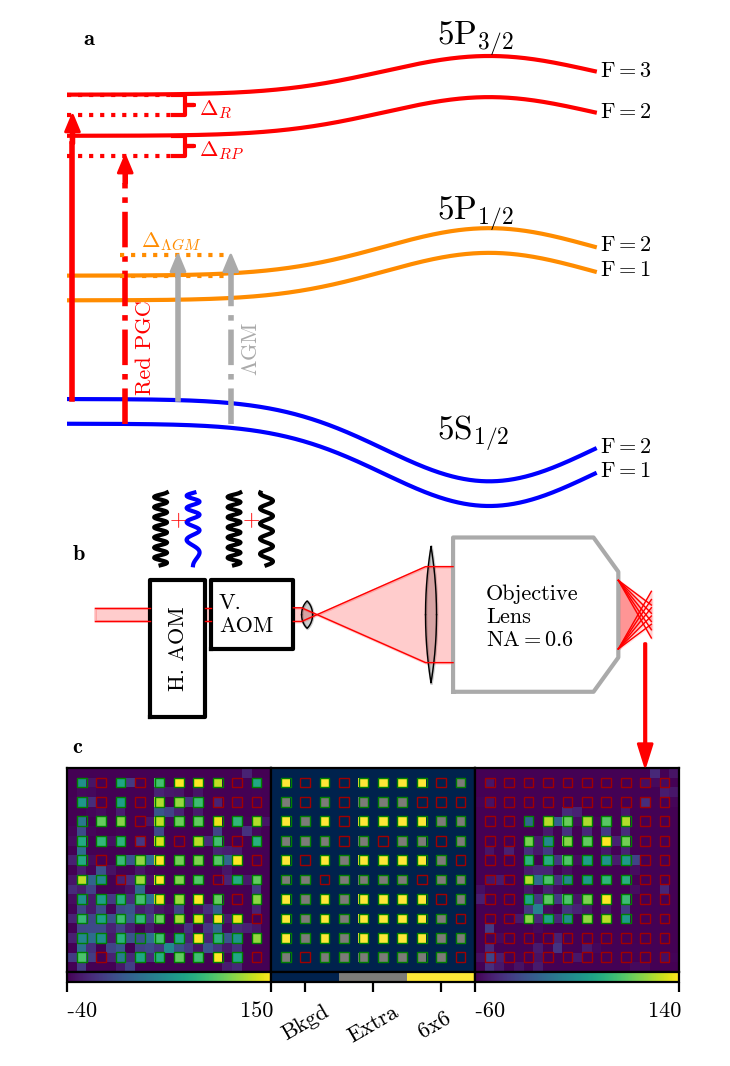

In [33]:
from matplotlib.font_manager import FontProperties
f = plt.figure()
f.set_size_inches(3.4,5.5)
gs = gridspec.GridSpec(10,3,left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0, hspace=0)
ax = plt.subplot(gs[0:5, :])
ax2 = plt.subplot(gs[5:7, :])
ax3_1 = plt.subplot(gs[7:10, 0])
ax3_2 = plt.subplot(gs[7:10, 1])
ax3_3 = plt.subplot(gs[7:10, 2])
fs=8
#########################################################################################3
# Level diagram
offs_12 = 1.5
offs_32 = 3.7
Split_S12 = -0.3
Split_P12 = -0.3
Split_P32 = -0.5
c_12 = 'darkorange'
c = 'red'

ax.axis('Off')
ax.set_xlim(-4,1.8)
xpts = np.linspace(-4,1,1000)
arrowProps = dict(linestyle='-',width=0.5, headwidth=5,headlength=8,color='k',shrink=0.05)
# ### Ground State (5S1/2)

ax.plot(xpts, gaussian.f(xpts,-1,0,1,0),'b')
ax.plot(xpts, gaussian.f(xpts,-1,0,1,Split_S12),'b')
ax.text(1.05, -0.65+Split_S12,'F$=1$',fontsize=fs);
ax.text(1.05, -0.65,'F$=2$',fontsize=fs);
ax.text(-0.5, -0.5,'5S$_{1/2}$',fontsize=12);

# ### 5P1/2
ax.plot(xpts, gaussian.f(xpts,0.577,0,1,offs_12),color=c_12)
ax.plot(xpts, gaussian.f(xpts,0.577,0,1,offs_12+Split_P12),color=c_12)
ax.text( -0.5, offs_12 + 0.67, '5P$_{1/2}$',fontsize=12)
ax.text( 1.05, offs_12 + 0.3 + Split_P12, 'F$=1$', fontsize=fs )
ax.text( 1.05, offs_12 + 0.3, 'F$=2$', fontsize=fs )

# ### 5P3/2
ax.plot(xpts, gaussian.f(xpts,0.470,0,1,offs_32),color=c)
ax.plot(xpts, gaussian.f(xpts,0.470,0,1,offs_32+Split_P32),color=c)
ax.text(-0.5, offs_32+0.6,'5P$_{3/2}$',fontsize=12)
ax.text(1.05, offs_32+0.22,'F$=3$',fontsize=fs)
ax.text(1.05, offs_32+Split_P32+0.22,'F$=2$',fontsize=fs)

###### Lasers
arrowPos, dx = -3.95, 0.5
lw, hw, hl = 1, 5, 6
# Red
ax.plot([-4,-3],[offs_32,offs_32],':', color=c )
ax.plot([-4,-3],[offs_32-0.25,offs_32-0.25],':', color=c )
ax.plot([-4,-3],[offs_32+Split_P32-0.25,offs_32+Split_P32-0.25],':', color=c )
ax.plot([-4,-4],[offs_32-0.25,offs_32-0.25],':', color=c )
bracket( ax, -3, offs_32-0.25, 0.25, 0.2, c=c)
ax.text(-2.75, offs_32-0.25,  '$\Delta_R$', fontsize=fs, color=c)
bracket( ax, -3, offs_32-0.25+Split_P32, 0.25, 0.2, c=c)
ax.text(-2.75, offs_32-0.25+Split_P32,  '$\Delta_{RP}$', fontsize=fs, color=c)
#ax.text(-4.3, 0.55,  'Red PGC Cooling Laser', fontsize=fs, color=c, rotation=90)
arrow(ax, arrowPos, 0, 0, offs_32-0.25, {"ls":"-",'color':'r', "linewidth":lw+1},
      {'width':lw, 'headwidth':hw, 'headlength':hl, 'color':'r'})
#ax.text(arrowPos+0.1,offs_12-0.25,'Red PGC Cool', rotation=90,color='r',fontsize=fs)
arrow(ax, arrowPos+dx, Split_S12, 0, -Split_S12 + offs_32+Split_P32-0.25, {"linewidth":lw+1,"ls":"-.",'color':'r'},
      {'width':lw, 'headwidth':hw, 'headlength':hl, 'color':'r'})
ax.text(arrowPos+dx+0.1,offs_12-0.4, 'Red PGC ', rotation=90,color='r',fontsize=fs)

# grey lasers
ax.plot([-3.5,-2.5], [offs_12+0.25,offs_12+0.25],':',color=c_12)
ax.plot([-3.5,-2.5], [offs_12,offs_12],':',color=c_12)
ax.text( -3.3, offs_12+0.35, '$\Delta_{\Lambda GM}$', fontsize=fs, color=c_12 );
#ax.text(-3.6, -0.2,  r'$\Lambda$GM Lasers', fontsize=fs, color="#A0A0A0", rotation=90);
lgmColor = "#AAAAAA"
arrow(ax, arrowPos+2*dx, 0, 0, offs_12+0.25, {"ls":"-",'color':lgmColor, "linewidth":lw+1},
      {'width':lw, 'headwidth':hw, 'headlength':hl, 'color':lgmColor})
#ax.text(arrowPos+2*dx+0.1,offs_12-0.25,'$\Lambda$GM Cool', rotation=90,color=lgmColor, fontsize=fs)
arrow(ax, arrowPos+3*dx, Split_S12, 0, -Split_S12 + offs_12+0.25, 
      {"ls":"-.",'color':lgmColor,"linewidth":lw+1},
      {'width':lw, 'headwidth':hw, 'headlength':hl, 'color':lgmColor})
ax.text(arrowPos+3*dx+0.1,offs_12-0.75,'$\Lambda$GM', rotation=90,color=lgmColor,fontsize=fs)

##################################################################################################
# EXPERIMENT DIAGRAM
ax2.axis("off")
laserargs = {"color":'r', 'linewidth':0.5}
lensargs = {"color":'k', 'linewidth':0.5}
#lasercolor='r'
#boundary
x1, x2 = -0.1, 8
y1, y2 = -1, 1
ax2.plot([x1,x2,x2,x1,x1], [y1,y1,y2,y2,y1], color='None');

# Horizontal AOM
px_h_aom, py = 0,-1.5
w_h_aom, h = 1,2
ax2.plot([px_h_aom,px_h_aom+w_h_aom,px_h_aom+w_h_aom,px_h_aom,px_h_aom], [py,py,py+h,py+h,py], color='k');
ax2.text(px_h_aom+w_h_aom/3, py+0.7*h, 'H. AOM', fontsize=fs, rotation=90)
# laser before aoms
px_p, py = -1, 0
lt=0.1
laser(ax2,[px_p, px_h_aom], [py+lt,py+lt], [py-lt,py-lt], laserargs)

# Vertical AOM
w_v_aom, px_v_aom, py = 1.5, 1.1, -0.5
ax2.plot([px_v_aom,px_v_aom+w_v_aom,px_v_aom+w_v_aom,px_v_aom,px_v_aom], [py,py,py+1,py+1,py], color='k');
ax2.text(px_v_aom+w_v_aom/10, py+0.25, 'V.\nAOM', fontsize=fs)
# laser between AOMs
i1, i2 = px_h_aom+w_h_aom, px_v_aom
laser(ax2,[i1,i2], [lt,lt],[-lt,-lt], laserargs)

# telescope glc
x_glc = px_v_aom + w_v_aom + 0.15
lens(ax2,x_glc,0,0.2,0.25, lensargs)
# telescope big
x_bl = 5
lens(ax2,x_bl,0,0.2,5, lensargs)

# High-NA lens
size = 0.75
w, h = arr((4,3))*size
px, py = (5.5,-h/2)
fx, fy = arr((0.85, 0.5))
ax2.plot([px, px+fx*w, px+w, px+w,px+fx*w,px,px], [py,py,py+fy,py+h-fy,py+h,py+h,py], color='#AAAAAA')
ax2.text(px+w/5, py+0.3*h, 'Objective\nLens\nNA$=0.6$', fontsize=fs)
# laser through telescope
y_l = 0.7
laser(ax2,[px_v_aom+w_v_aom, x_glc, x_bl, px ], [lt,lt,-y_l,-y_l], [-lt,-lt,y_l,y_l], laserargs)
# lasers after sill (loop for each pt)
y_l = 0.5
nt = 5
y_e = 0.2
for n in range(nt):
    yf = -y_e+y_e*2*n/(nt-1)
    laser(ax2,[px+w, px+w+y_l, px+w+1.2*y_l], [y_l, yf, yf - 0.2*(-yf+y_l)], 
          [-y_l, yf, yf + 0.2*(yf+y_l)], laserargs, alpha=0.1)
x_atom = px+w+y_l
# stuff for pointing to atoms
y_dl = 0.5
# sine wave for horizontal aom
s = 2.5
a_sh = inset_axes(ax2, width=0.25, height=0.4, bbox_to_anchor=(0, 0, 0.22, 1.2), bbox_transform=ax2.transAxes, borderpad=0)
x_sin = np.linspace(0,2*np.pi*1.2,100)
a_sh.plot(-s+np.sin(6*x_sin), x_sin, color='k')
a_sh.text(-1.1,1.3*np.pi,'+',color='r')
a_sh.plot(s+np.sin(x_sin**1.6), x_sin,color='b')
a_sh.axis('off')

# sine wave for v aom
a_sv = inset_axes(ax2, width=0.25, height=0.4, bbox_to_anchor=(0, 0, 0.34, 1.2),
                 bbox_transform=ax2.transAxes, borderpad=0)
a_sv.plot(-s+np.sin(6*x_sin), x_sin, color='k')
a_sv.text(-1.1,1.3*np.pi,'+',color='r')
a_sv.plot(s+np.sin(4*x_sin), x_sin,color='k')
a_sv.axis('off')

####################################################################
# RERNG
which = 3
numAtoms = sum([bool(x) for y in atomizedPics36[which] for x in y])

#f.set_size_inches([20,4.25])
init_ = np.zeros((21,21))
thresholdInc = 0
avgThresh = 0
for thresh in loadThresholds:
    avgThresh += thresh.t
avgThresh /= 100
for loc in ah.unpackAtomLocations([0,0,1,21,21]):
    init_[loc[0],loc[1]] = initPics36[which][loc[0],loc[1]] - t_image[loc[0],loc[1]]
fin_ = np.zeros((21,21))
thresholdInc=0
for loc in ah.unpackAtomLocations([0,0,1,21,21]):
    init_[loc[0],loc[1]] = initPics36[which][loc[0],loc[1]] - t_image[loc[0],loc[1]]
for loc in ah.unpackAtomLocations([0,0,1,21,21]):
    fin_[loc[0],loc[1]] = finPics36[which][loc[0],loc[1]] - t_image[loc[0],loc[1]]

# initAtomized
pics   = [init_, atomizedPics36[which][2:23,1:22], fin_] 
mins   = [-40,0,-60]
maxs   = [150,2,140]
cmaps  = ['viridis', mpl.cm.get_cmap('cividis',3), 'viridis']
titles = ['Initial', 'Atomized-Selected', 'Final']

for i, (a, p, _min, _max, cm, t) in enumerate(zip([ax3_1,ax3_2,ax3_3], pics, mins, maxs, cmaps, titles)):
    im = a.imshow(p, origin='bottom', cmap=cm, vmin=_min, vmax=_max)
    a.set_xticks([])
    a.set_yticks([])
    a.grid(False)
    for loc in ah.unpackAtomLocations([1,1,2,10,10]):
        if i < 2:
            color = 'g' if atomizedPics36[which][2:23,1:22][loc[0],loc[1]] else '#A00000'
            a.add_patch(plt.Rectangle((loc[1]-0.5, loc[0]-0.5),1,1, zorder=2, facecolor='none', edgecolor=color,linewidth=0.5))
        else:
            #color = '#505050'
            color = 'g' if finAtomized36[which][2:23,1:22][loc[0],loc[1]] else '#A00000'
            a.add_patch(plt.Rectangle((loc[1]-0.5, loc[0]-0.5),1,1, zorder=2, facecolor='none', edgecolor=color,linewidth=0.5))
    divider = make_axes_locatable(a)
    cax = divider.new_vertical(size="5%", pad=0, pack_start=True)
    f.add_axes(cax)
    cb = f.colorbar(im, cax=cax, orientation="horizontal")
    if i is 1:
        cb.set_ticks([1/3,1,5/3])
        cb.ax.set_xticklabels(['Bkgd','Extra','6x6  '],rotation=30)
    else:
        cb.set_ticks([_min,_max])
        cb.ax.set_xticklabels(['    ' + str(_min),str(_max) + '    '],rotation=0)
    cb.ax.tick_params(labelsize=fs)
arrowProps = dict(linestyle='-',width=0.5, headwidth=5,headlength=8,color='r',shrink=0.05)
ax3_3.annotate("", xy=(17, 20), xytext=(17, 34), arrowprops=arrowProps);
font = FontProperties()
font.set_family('cmb10')
font.set_size( 8 )
ax3_1.text(0,22,'c',   fontproperties=font)
ax2.text(-1.4,0.8,'b', fontproperties=font)
ax.text( -3.85, 4.3, 'a', fontproperties=font )

plt.savefig('Figure_1.png', pad_inches=0, dpi=400)

In [23]:
mpl.rcParams['figure.dpi']= 200

Number of Pictures: 10000
Picture Dimensions: 25 x 23
Variaitons: 1
Repetitions: 5000
Experiment started at (H:M:S)  19:59:19:  on (Y-M-D) 2018-9-14


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:785: OptimizeWarning:

Covariance of the parameters could not be estimated



5


..\MatplotlibPlotters.py:490: RuntimeWarning:

invalid value encountered in double_scalars



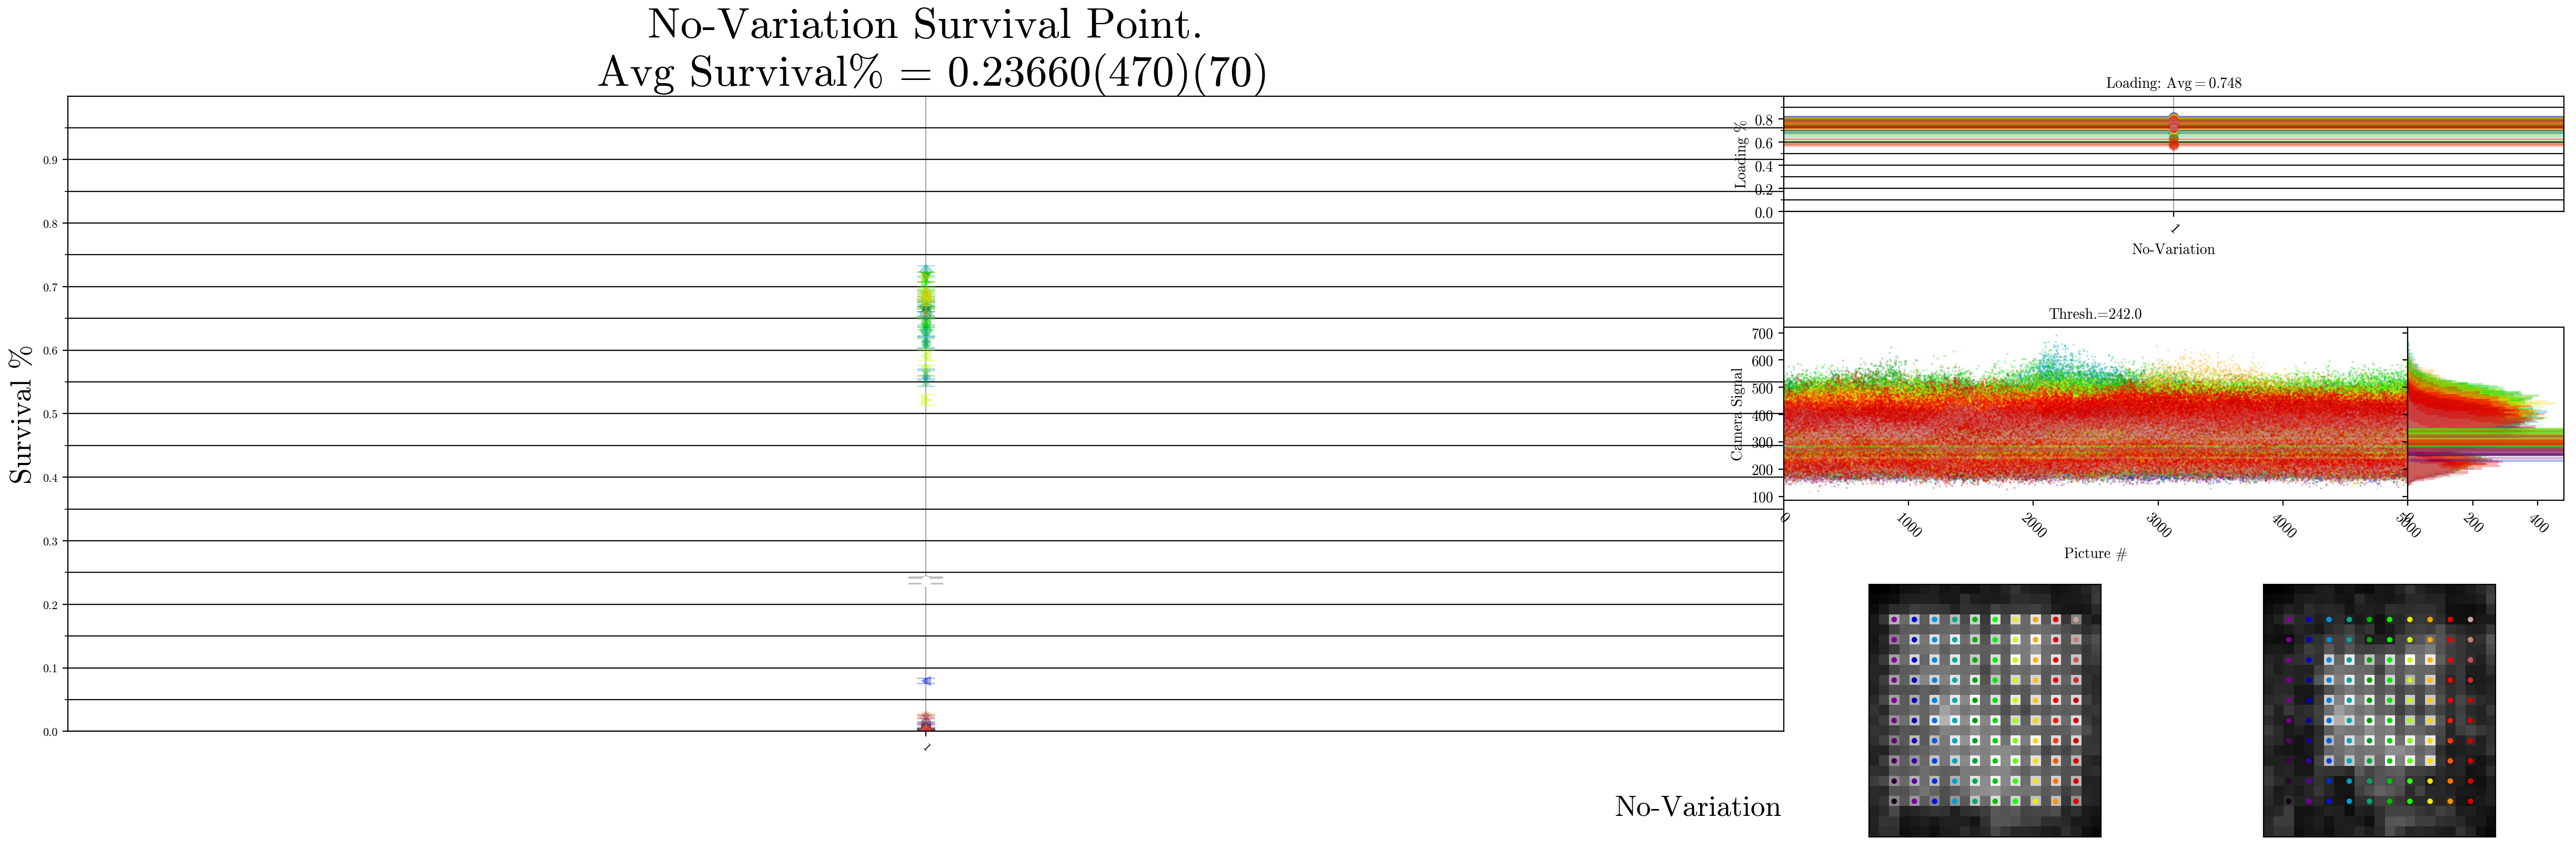

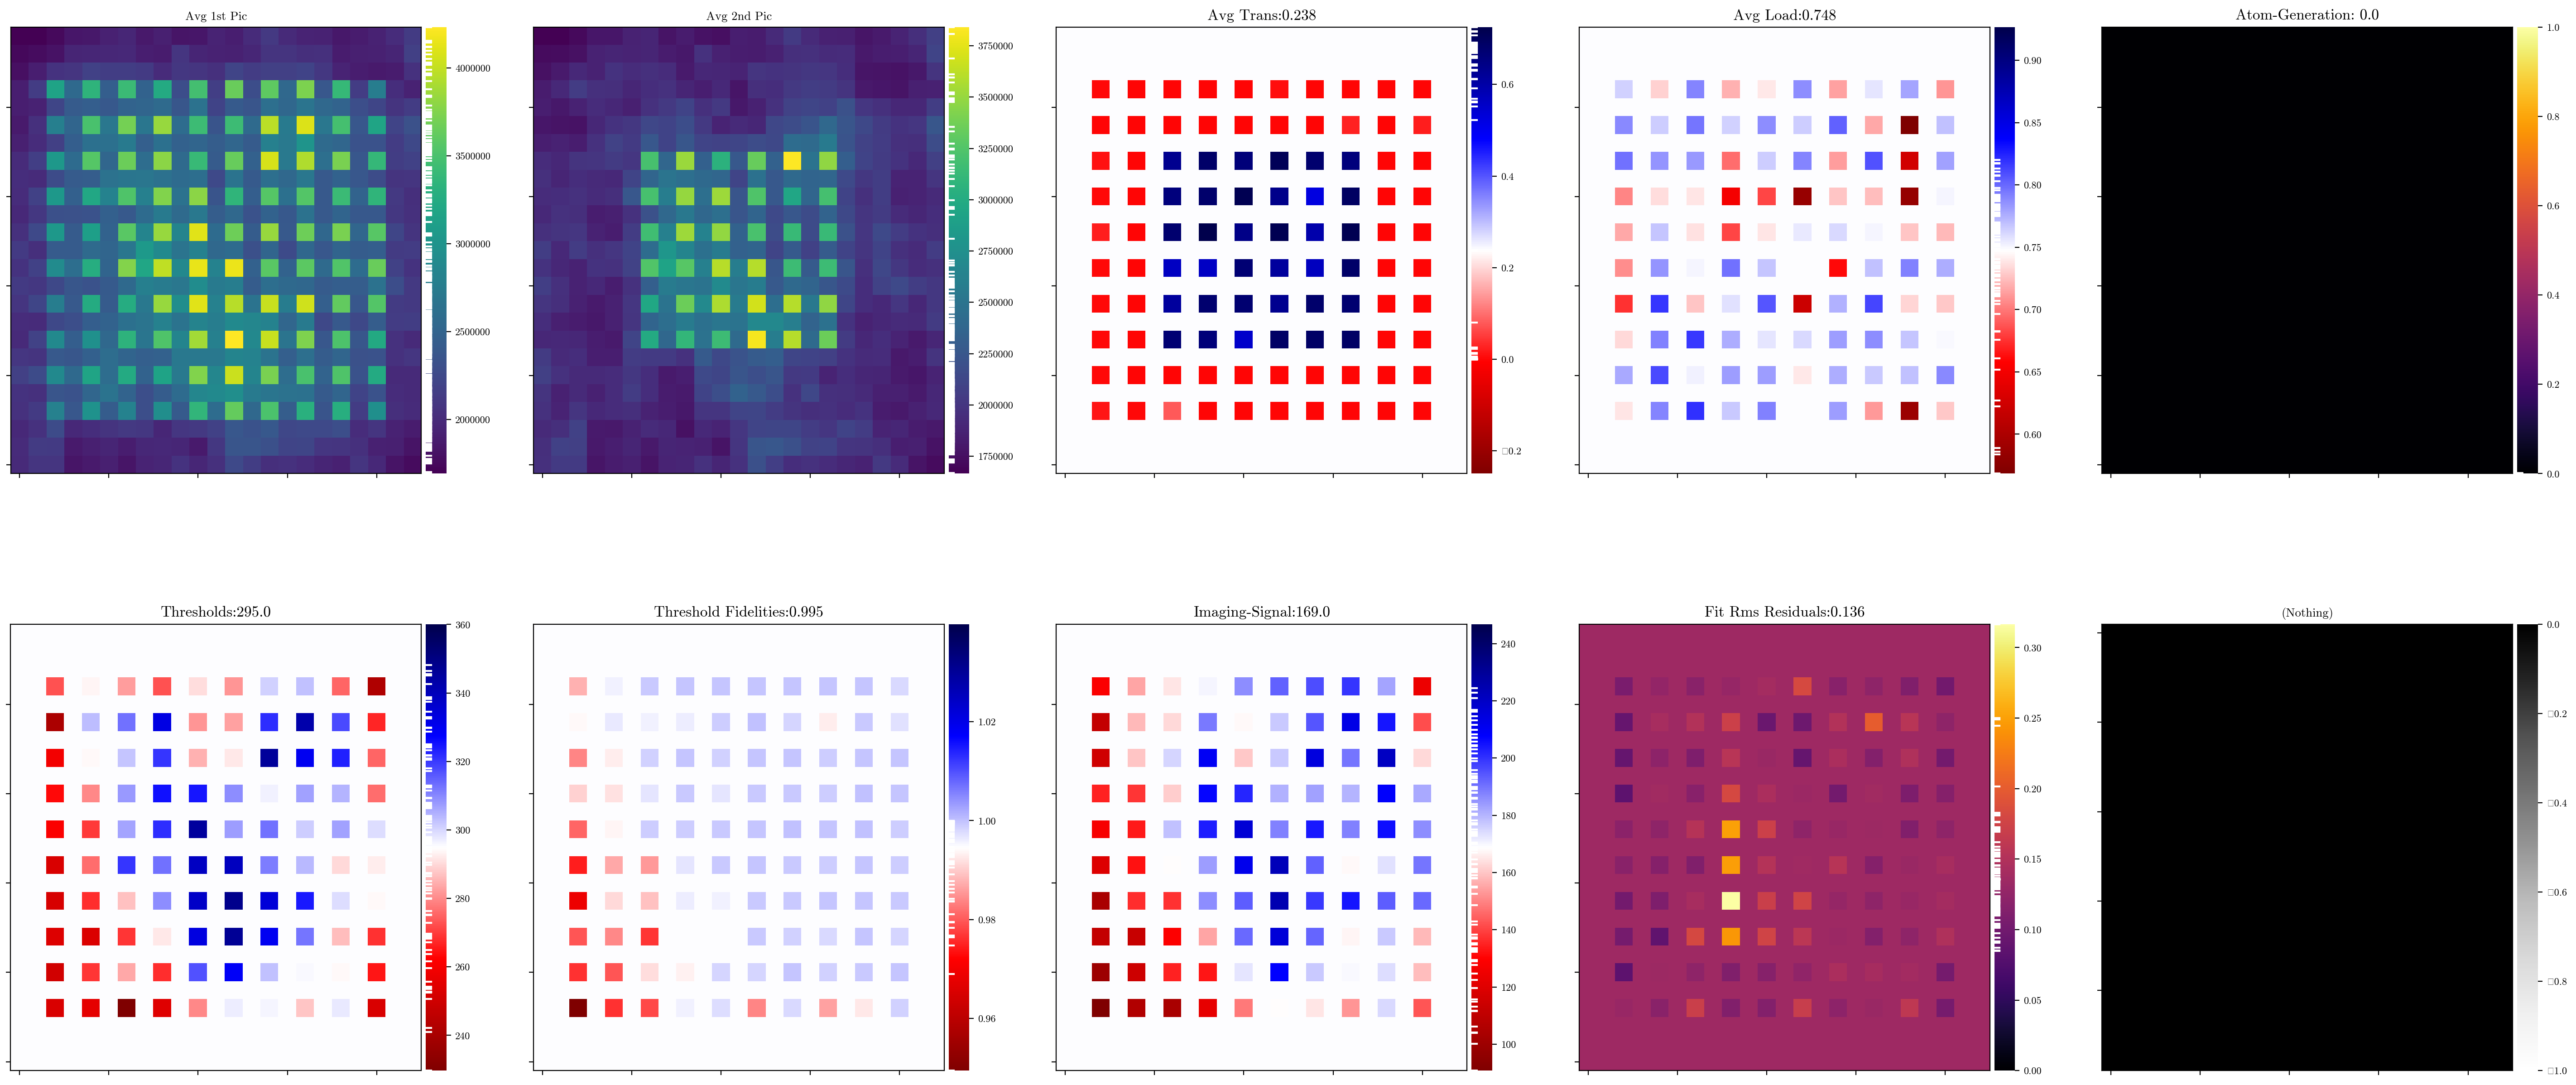

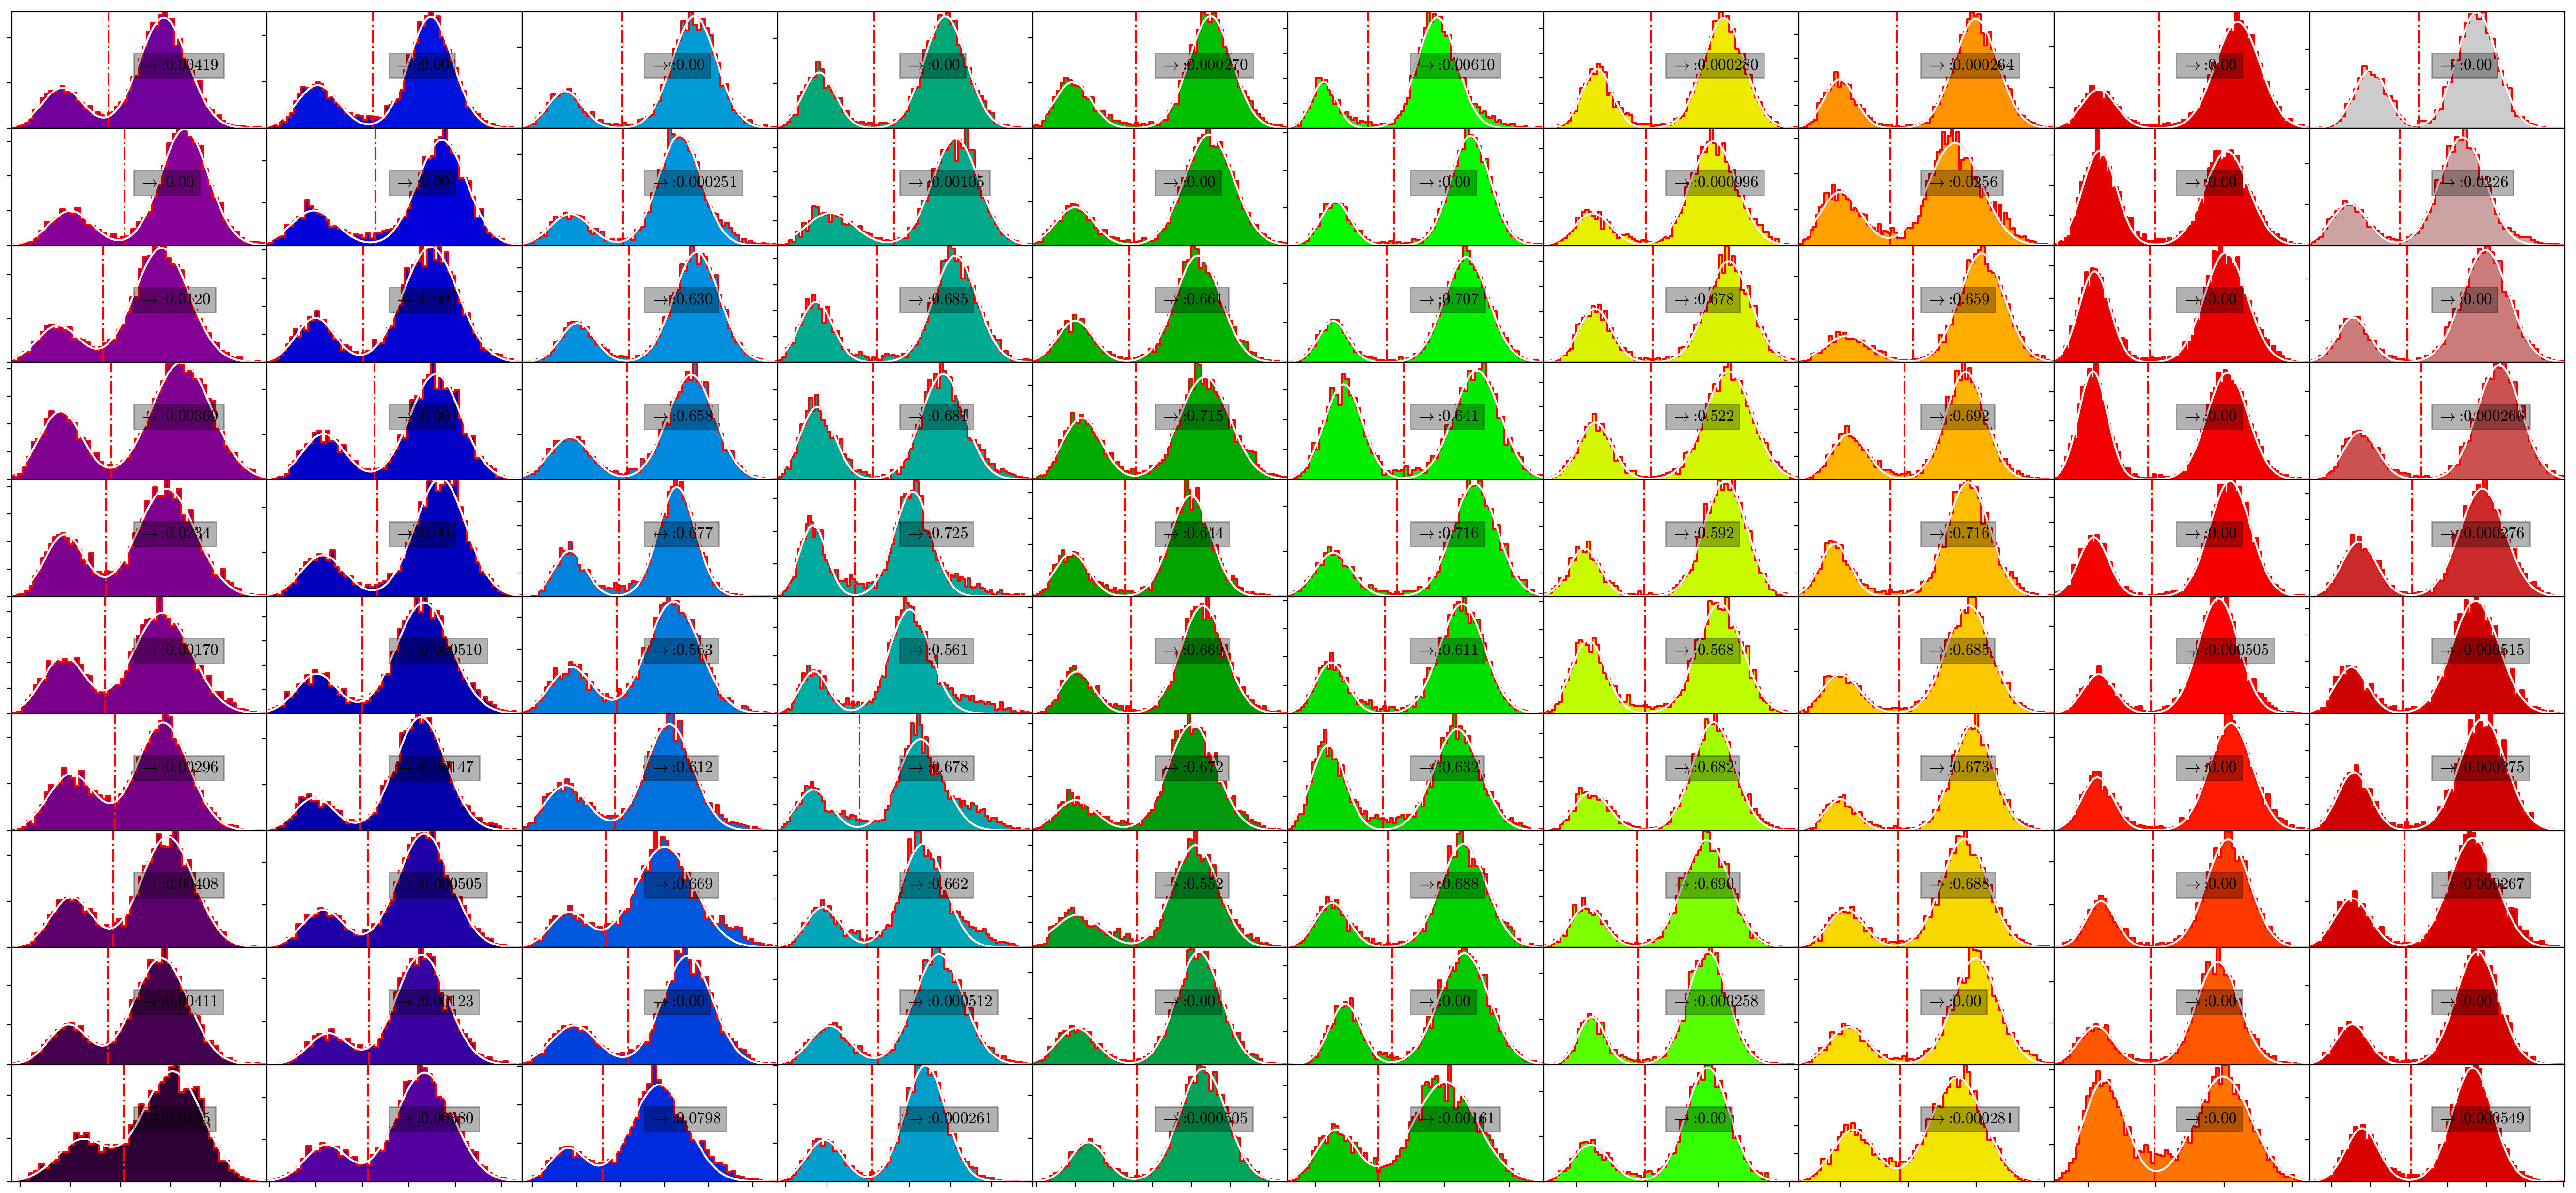

In [24]:
res = mp.Survival(rerng_exp_file, [3,2,2,10,10], subtractEdgeCounts=False, transThresholdSame=True, plotIndvHists=True);
( key, transferData, transferErrs, loadingRate, fits, avgFit, genAvgs, genErrs, pic1Data, 
  centers, avgTransferPic, transVarAvg, transVarErr, avgTransferData, avgTransferErr,
  loadAtomImages, transAtomImages, pic2Data, loadThresholds, transThresholds) = res

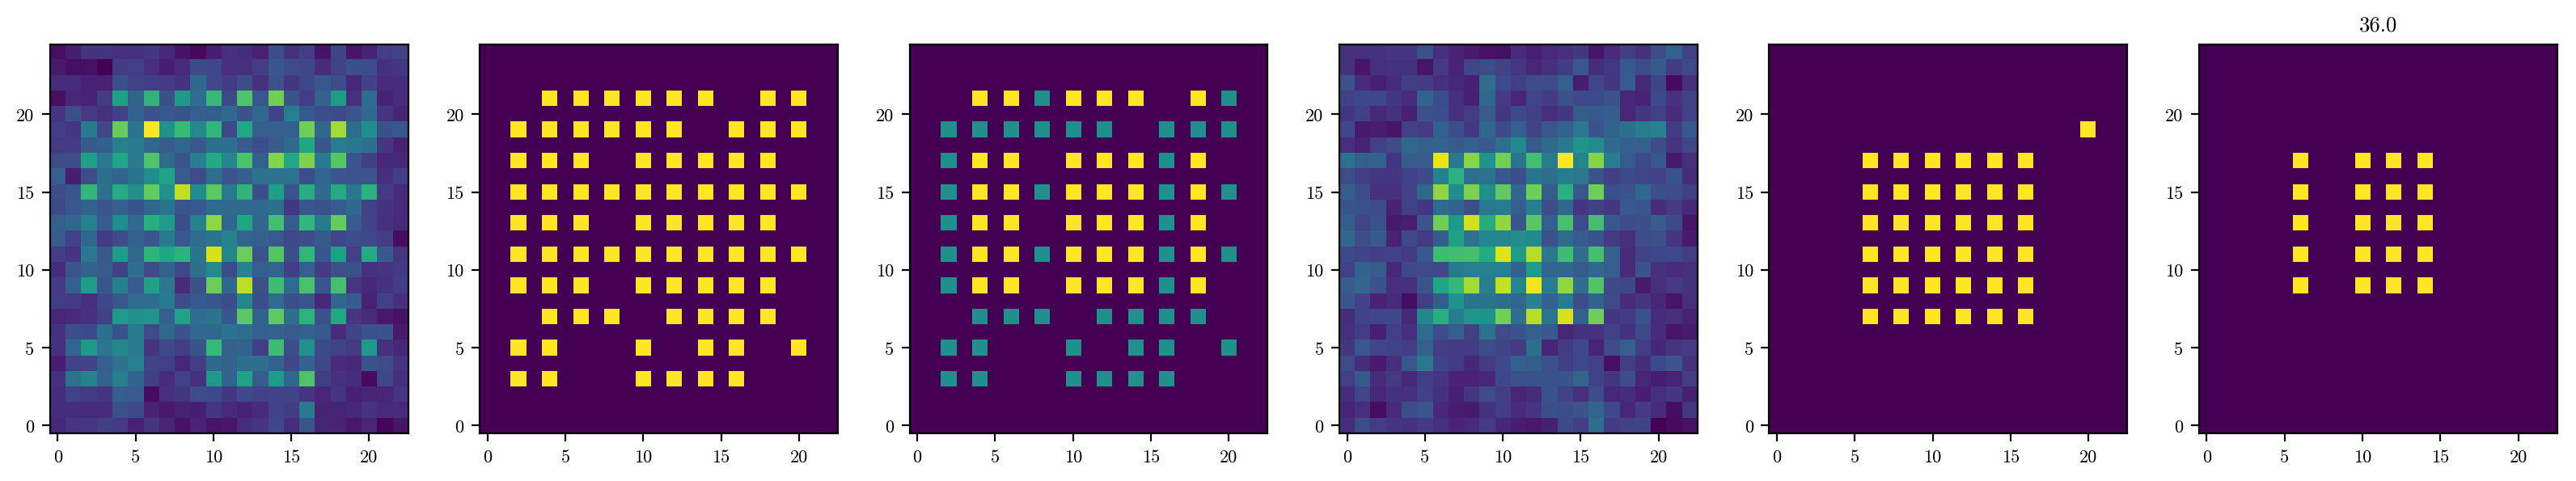

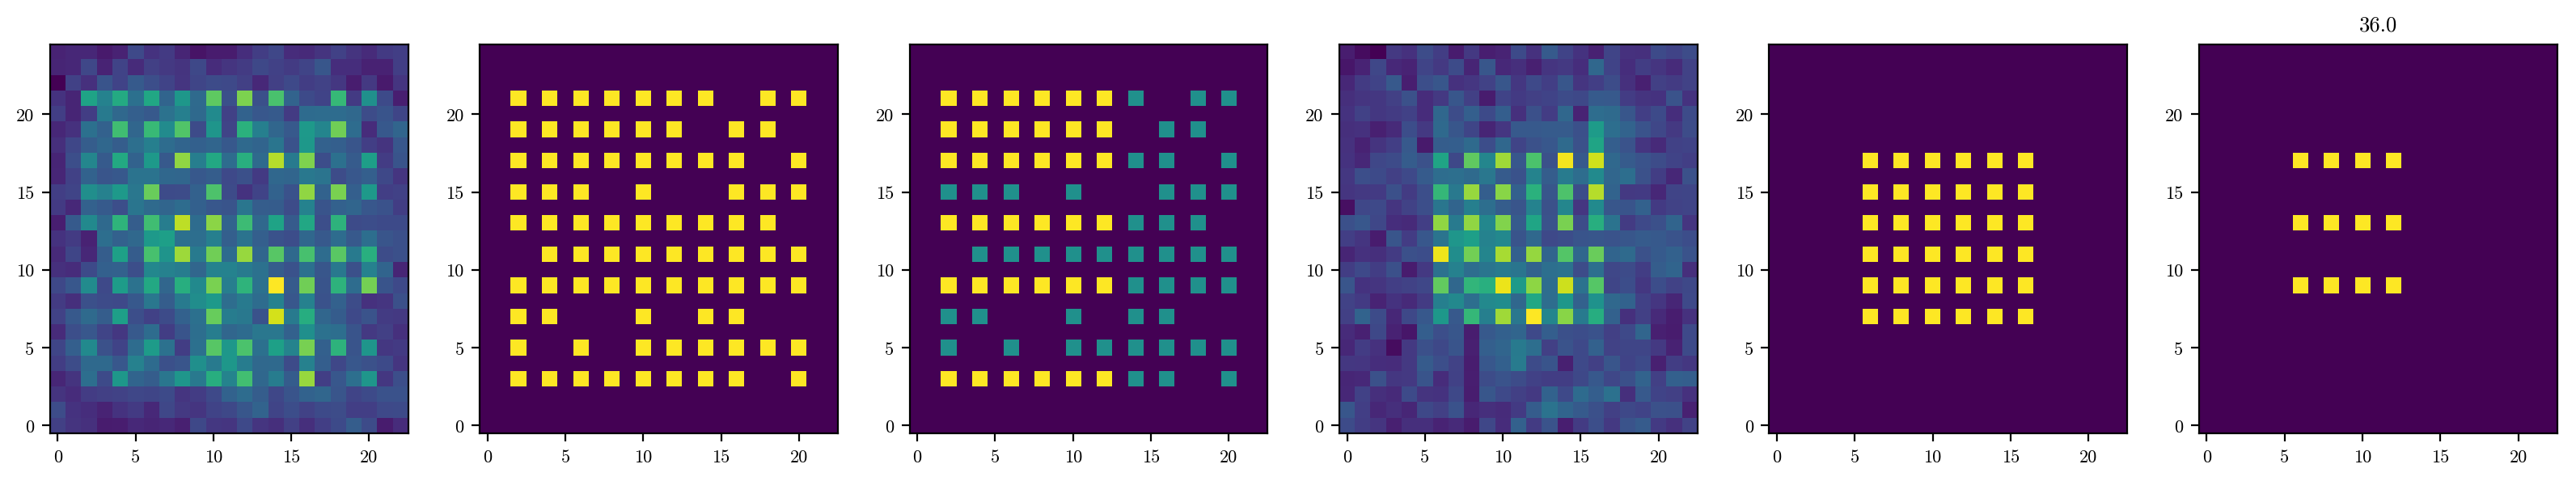

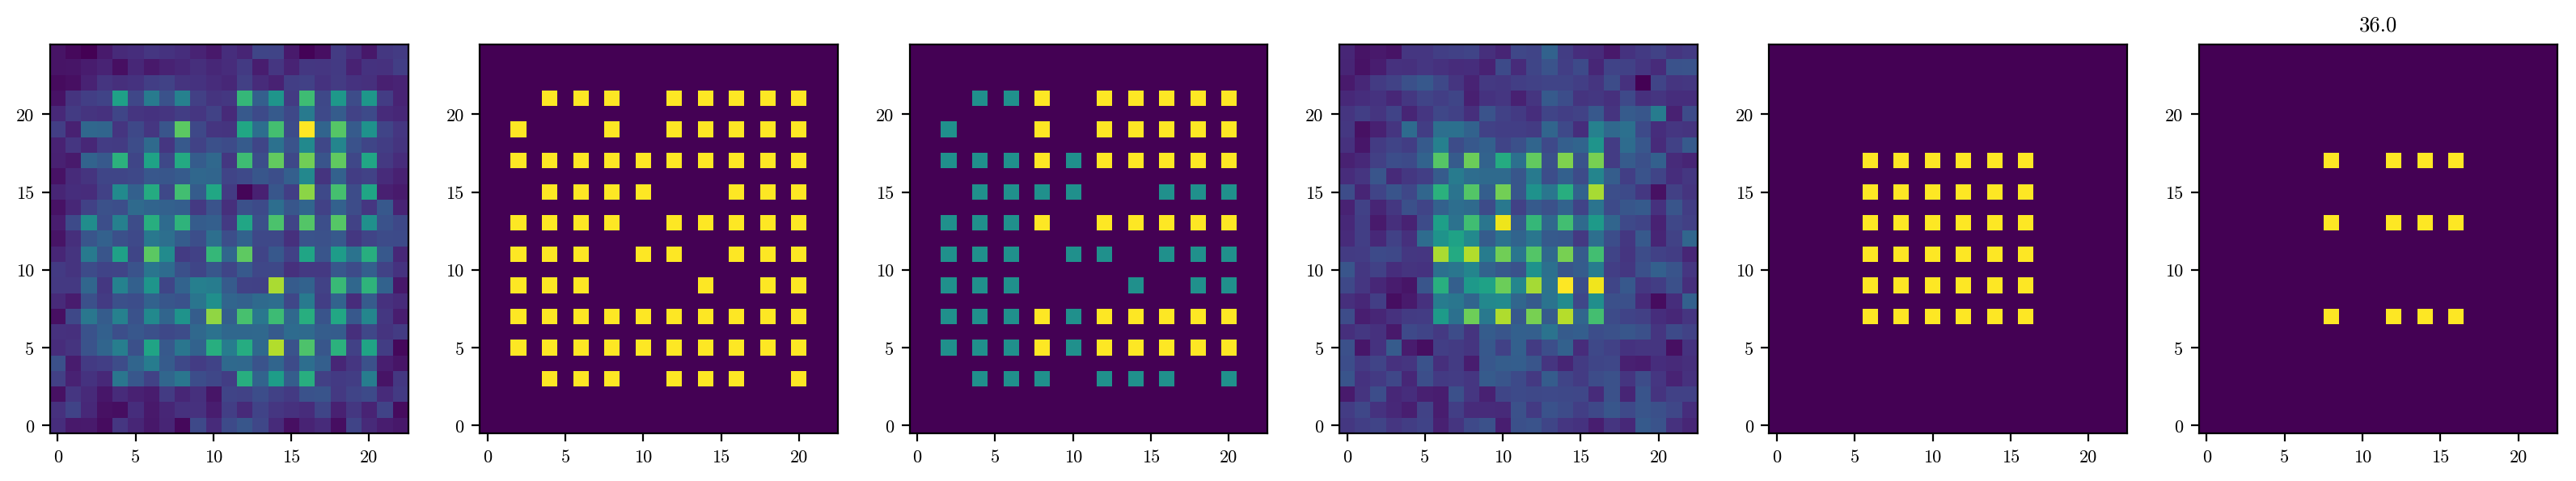

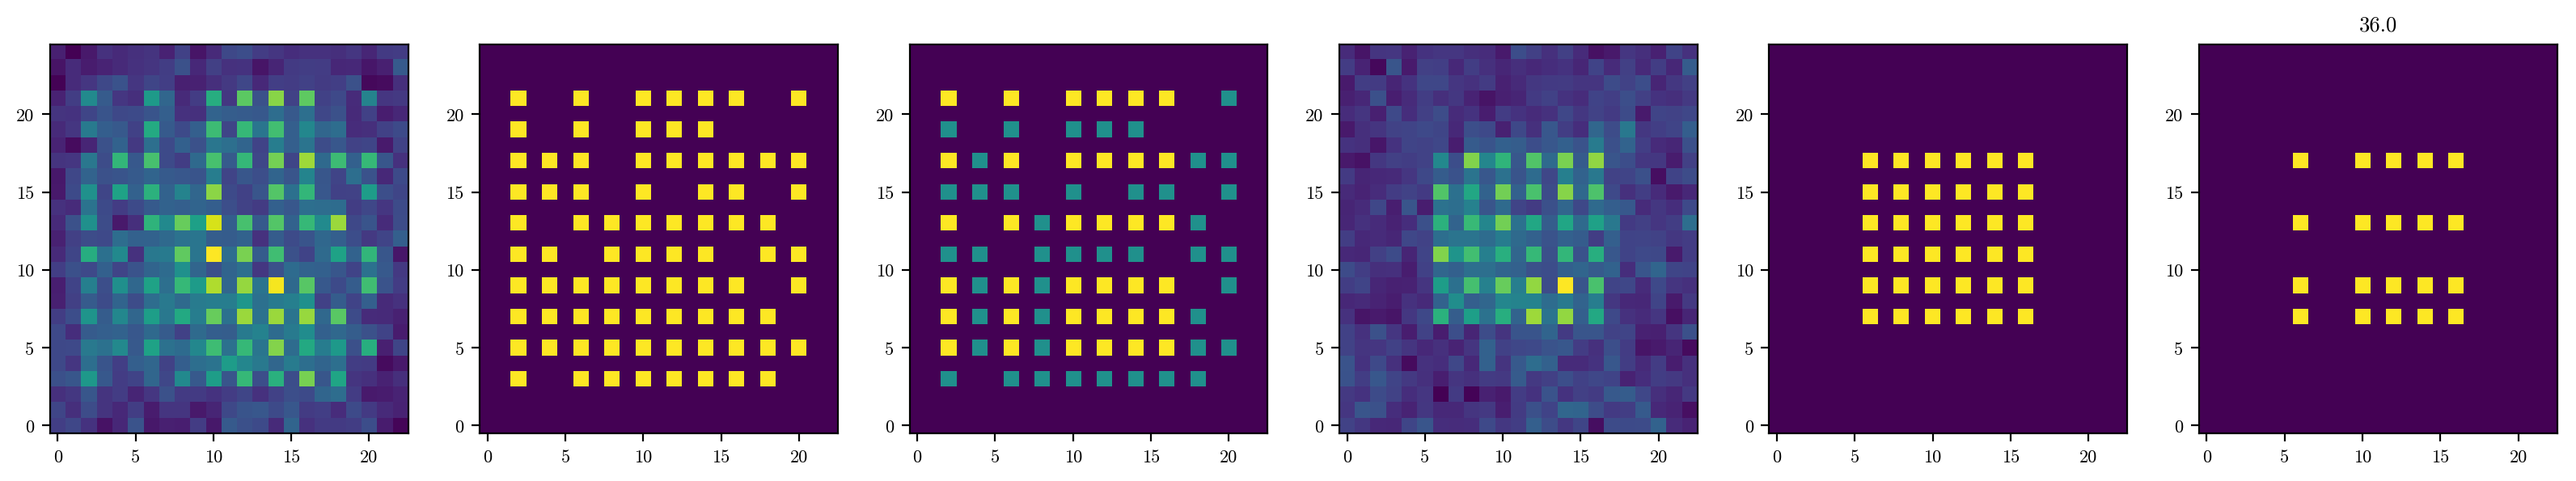

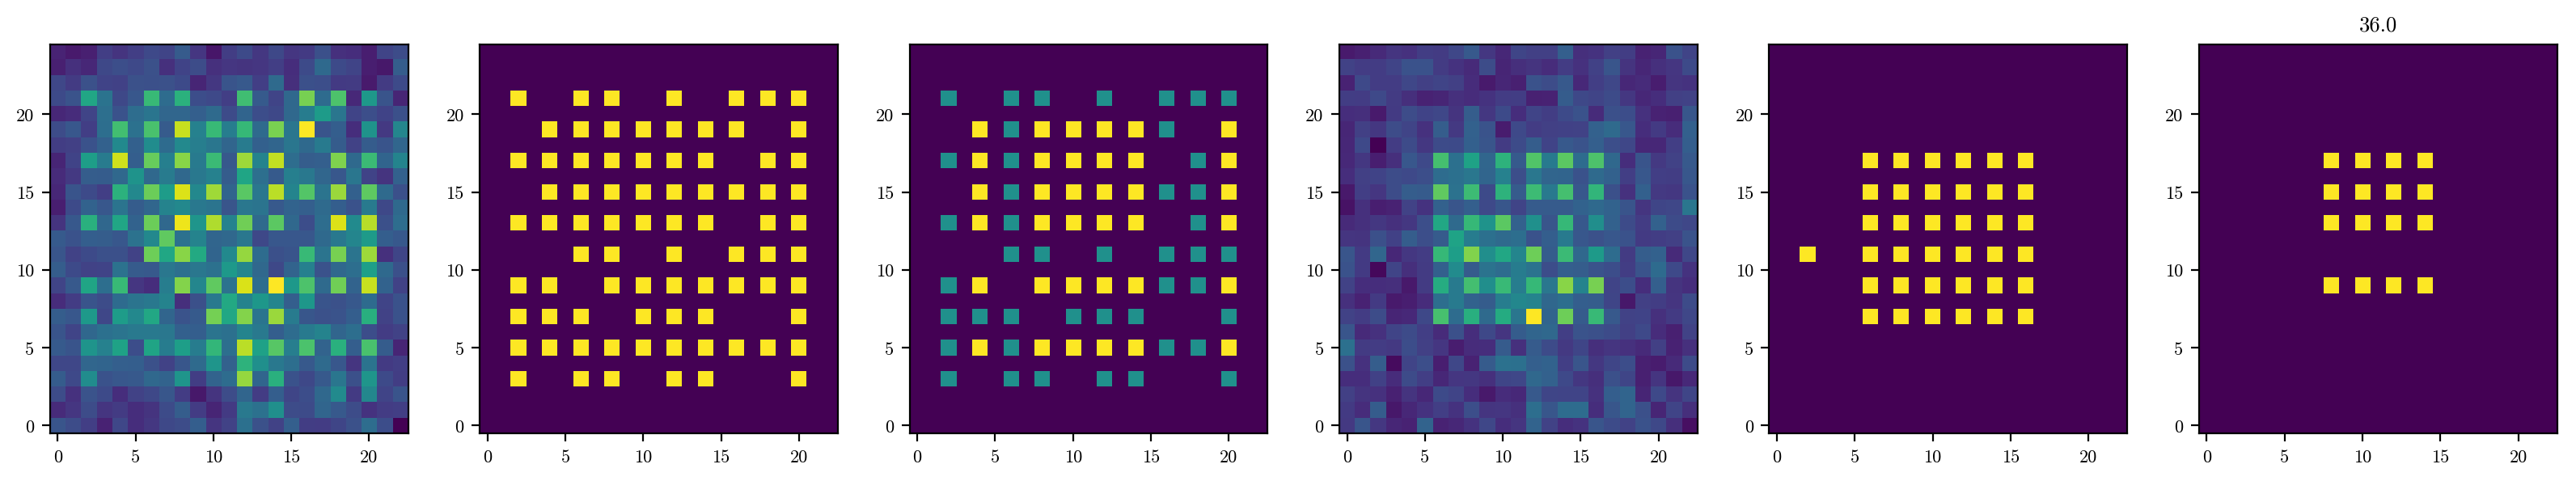

In [25]:
with exp.ExpFile(rerng_exp_file) as f:
    pics = f.get_pics()
count25 = 0
survivalList=[]
nomatch = 0
rerngSize = 6
finArray = np.zeros((25,23))
finlocs = ah.unpackAtomLocations([7,6,2,6,6])
for l in finlocs:
    finArray[l[0],l[1]] = 1
initPics36 = []
finPics36 = []
atomizedPics36 = []
finAtomized36 = []
initAtomized=[]
    
with open(rerng_moves_record) as f:
    for i, l in enumerate(f.readlines()[:]):
        if i < rerngSize+2:
            continue
        ln = i-rerngSize-2
        if ln % 4 == 0:
            continue
        if ln%4 == 1:
            expnum = int(int(ln)/4)
            sourceStr = l[7:-5]
            for x in [' ',';','\n']:
                sourceStr = sourceStr.replace(x,'')
            source = np.reshape([int(x) for x in sourceStr.split(',')],(10,10))
            sourcem = np.zeros((25,23)).astype(int)
            for i in range(10):
                for j in range(10):
                    if source[i,j]:
                        sourcem[2*i+3,2*j+2] = 1
        if ln%4 == 2:
            yind = [int(x) for x in l[:-3].split(',')]
        if ln%4 == 3:
            xind = [int(x) for x in l[:-3].split(',')]
            if yind == xind == [9,8,7,6,5,4]:
                nomatch += 1
                continue
            subm = np.zeros((25,23)).astype(int)
            for i in range(10):
                for j in range(10):
                    if i in yind and j in xind:
                        subm[2*i+3,2*j+2] = 1
            finNumAtoms = sum((transAtomImages[expnum] * finArray).flatten())
            survivalList.append(finNumAtoms)
            if (finNumAtoms >= 36):
                count25 += 1
                initPics36.append(pics[2*expnum])
                initAtomized.append(loadAtomImages[expnum])
                atomizedPics36.append(loadAtomImages[expnum] + subm)
                finAtomized36.append(transAtomImages[expnum])
                finPics36.append(pics[2*expnum+1])
                if True:
                    f, ax = plt.subplots(1,6, figsize=(20,20))
                    plt.title(finNumAtoms)
                    ax[0].imshow(pics[2*expnum], origin='bottom')
                    ax[1].imshow(loadAtomImages[expnum], origin='bottom')
                    ax[2].imshow(loadAtomImages[expnum] + subm, origin='bottom')
                    ax[3].imshow(pics[2*expnum+1], origin='bottom')
                    ax[4].imshow(transAtomImages[expnum], origin='bottom')
                    ax[5].imshow(transAtomImages[expnum] * subm, origin='bottom')
                    for a in ax:
                        a.grid(False)

In [26]:
for i in range(len(initPics36)):
    initPics36[i] = initPics36[i][2:23,1:22]
for i in range(len(finPics36)):
    finPics36[i] = finPics36[i][2:23,1:22]

# Bkgd for sub

last pic is a bit less crucial maybe because less atoms so less chaotic

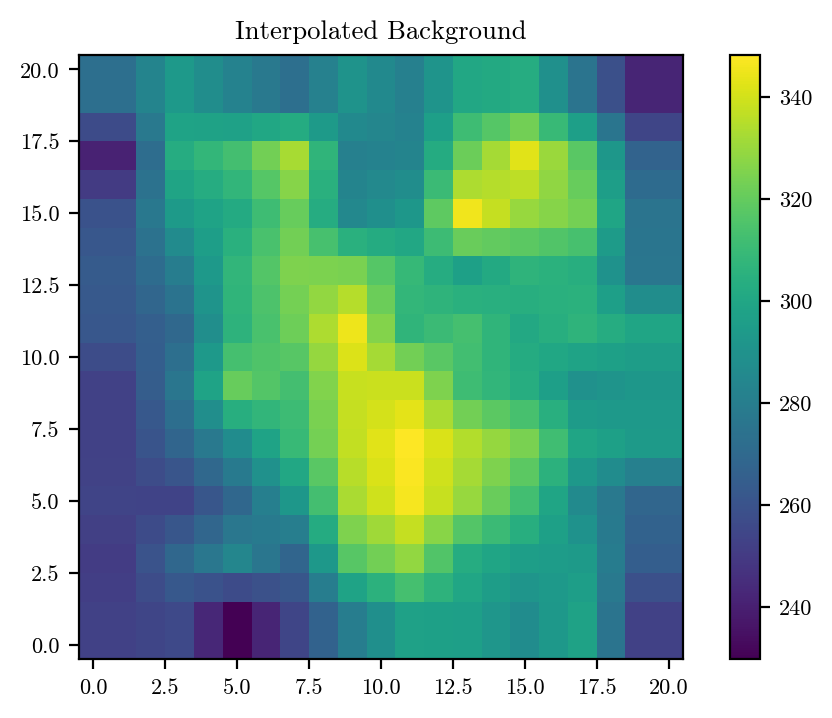

In [27]:
t_image = np.zeros(initPics36[0].shape)
# atoms
for i, loc in enumerate(ah.unpackAtomLocations([1,1,2,10,10])):
    t_image[loc[0],loc[1]] = loadThresholds[i].t
# between hor
for i, loc in enumerate(ah.unpackAtomLocations([2,1,2,10,9])):
    t_image[loc[0],loc[1]] = (t_image[loc[0]-1,loc[1]] + t_image[loc[0] + 1,loc[1]])/2
for i, loc in enumerate(ah.unpackAtomLocations([1,2,2,9,10])):
    t_image[loc[0],loc[1]] = (t_image[loc[0],loc[1]-1] + t_image[loc[0],loc[1]+1])/2
for i, l in enumerate(ah.unpackAtomLocations([2,2,2,9,9])):
    t_image[l[0],l[1]] = (t_image[l[0]-1,l[1]-1] + t_image[l[0]+1,l[1]+1]
                          +t_image[l[0]+1,l[1]-1] + t_image[l[0]-1,l[1]+1])/4

for r in range(21):
    t_image[r,0] = t_image[r,1]
    t_image[r,20] = t_image[r,19]
for c in range(21):
    t_image[0,c] = t_image[1,c]
    t_image[20,c] = t_image[19,c]
#t_image = t_image[2:23,1:22]
plt.imshow(t_image, origin='bottom')
plt.colorbar()
plt.title('Interpolated Background');


In [28]:
from fitters import double_gaussian

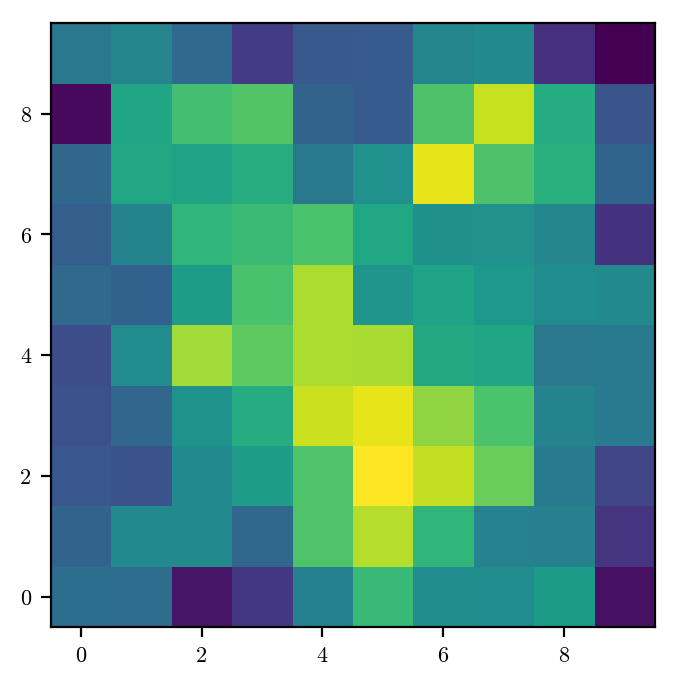

In [29]:
im = np.zeros((10,10))
for i, loc in enumerate(ah.unpackAtomLocations([0,0,1,10,10])):
    v=min([loadThresholds[i].fitVals[1], loadThresholds[i].fitVals[4]])
    im[loc[0],loc[1]] = v
plt.imshow(im, origin='bottom')